In [12]:
# Import libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [13]:
# Load Comments

comments = pd.read_csv("data/comments.csv", delimiter="\t", header=None, names=["EntryID", "PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"])
print(comments.shape)
print(comments.head())


(3749891, 13)
                                             EntryID  \
0  e/ed12adf025b5491da54c4ff2c8c5377a/c/c2dbc8151...   
1  e/7f6fb13b5a99449bb9dcbb3f8693be73/c/7477fb677...   
2  e/624ca9226b6526ebdb69f9b46df482c7/c/32c6bf5bc...   
3  e/2fdf59e075094fe1847137af34eda0f7/c/eb22afe81...   
4  e/4d8de05f989d43a4b90bfbfc59751e1c/c/d472f7b81...   

                               PostID      PostedBy  SourceName  \
0  e/ed12adf025b5491da54c4ff2c8c5377a  koenigdublin         NaN   
1  e/7f6fb13b5a99449bb9dcbb3f8693be73  ilportalinux         NaN   
2  e/624ca9226b6526ebdb69f9b46df482c7    guardianuk         NaN   
3  e/2fdf59e075094fe1847137af34eda0f7          nahi  m.ctor.org   
4  e/4d8de05f989d43a4b90bfbfc59751e1c       miocaro         NaN   

                SourceURL GeoX GeoY            Timestamp  \
0                     NaN   \N   \N  2010-08-06 15:06:32   
1                     NaN   \N   \N  2010-08-06 15:06:32   
2                     NaN   \N   \N  2010-08-06 14:45:07   
3  htt

In [14]:
# Load Users

users = pd.read_csv("data/users.csv", delimiter="|", header=None, names=["ID", "Type", "Name", "ReservedField", "Description"], on_bad_lines='skip')
print(users.shape)
print(users.head())

(665382, 5)
                   ID  Type                       Name ReservedField  \
0               2gwsk  user                  Ming Quek      2a9209ad   
1              iroach  user                Isaac Roach      20948a19   
2           tonybraun  user                 Tony Braun      f68e8b26   
3  junknajidyahoocom1  user         Junknajid Yahoocom      98a02bb6   
4   spaceastronautics  user  Space & Astronautics News      c3178cfa   

                                         Description  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  NASA, ESA, NOAA, USGS, astronomy, space, weath...  


In [15]:
# Load Following

following = pd.read_csv("data/following.csv", delimiter="\t", header=None, names=["FollowedID", "FollowerID", "Timestamp"], on_bad_lines='skip')
print(following.shape)
print(following.head())


(19547158, 3)
      FollowedID      FollowerID                   Timestamp
0      njsinc4el    brendafranzo  2010-08-01 16:21:37.562726
1      njsinc4el       praguebob  2010-08-01 16:21:37.565893
2  zachhwilliams      hungheroic  2010-08-01 16:21:37.779807
3  zachhwilliams      ridwan2906  2010-08-01 16:21:37.780406
4  zachhwilliams  nickcodipietro  2010-08-01 16:21:37.780894


In [16]:
# Load Services

services = pd.read_csv("data/services.csv", delimiter="|", header=None, names=["UserID", "ServiceID", "ServiceName", "ServiceURL", "UserNameOnService", "UserURLOnService"], on_bad_lines='skip')
print(services.shape)
print(services.head())

# Get all distict service names
service_names = services['ServiceName'].unique()
print(service_names)

(1587290, 6)
   UserID   ServiceID        ServiceName                         ServiceURL  \
0   2gwsk        blog               Blog  http://en.wikipedia.org/wiki/Blog   
1   2gwsk     twitter            Twitter                http://twitter.com/   
2  iroach    facebook           Facebook           http://www.facebook.com/   
3  iroach  googletalk  Gmail/Google Talk            http://talk.google.com/   
4  iroach     twitter            Twitter                http://twitter.com/   

  UserNameOnService                                  UserURLOnService  
0               NaN                        http://2gwsk.wordpress.com  
1             2gwsk                          http://twitter.com/2gwsk  
2               NaN  http://www.facebook.com/profile.php?id=688384411  
3               NaN                                               NaN  
4            iroach                         http://twitter.com/iroach  
['Blog' 'Twitter' 'Facebook' 'Gmail/Google Talk' 'Digg' 'LinkedIn'
 'Pandora' 'S

In [17]:
# Load Subscriptions

subscriptions = pd.read_csv("data/subscriptions.csv", delimiter=",", header=None, names=["CreatorId", "SubscriberId"], on_bad_lines='skip')
print(subscriptions.shape)
print(subscriptions.head())


(27811816, 2)
    CreatorId SubscriberId
0  seoptimise        2gwsk
1       xahac        2gwsk
2   kmorrison       iroach
3  seoptimise       iroach
4       skyje       iroach


In [18]:
# Load Likes

likes = pd.read_csv("data/likes.csv", delimiter="\t", header=None, names=["userID", "PostID", "Timestamp"], on_bad_lines='skip')
print(likes.shape)
print(likes.head())


(798112, 3)
             userID                              PostID            Timestamp
0           yasinde  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-04-28 07:17:43
1  socialnewsturkey  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 20:10:02
2             janzu  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 19:50:57
3        mugecerman  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 19:18:38
4           miocaro  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 17:31:31


In [19]:
# Load Entries/Posts

entries1 = pd.read_csv("data/entries1.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries2 = pd.read_csv("data/entries1.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries3 = pd.read_csv("data/entries1.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries = pd.concat([entries1, entries2, entries3], ignore_index=True)
print(entries.shape)
print(entries.head())

# Get date of first and last post
entries['Timestamp'] = pd.to_datetime(entries['Timestamp'], unit='s')
print(f"First post: {entries['Timestamp'].min()}")
print(f"Last post: {entries['Timestamp'].max()}")


(12000000, 12)
                               PostID     PostedBy             SourceName  \
0  e/29af803d670fb8d67692095f3ee623e6    newsroom1  Ottawa Citizen - News   
1  e/9c8413a376bec6389be4d46d0812c2bb  mehmetinnet           Mehmetin.Net   
2  e/2d658d97842a466a9513f587f85b0e59  mehmetergin           Mehmetin.Net   
3  e/b269ab5d56be4e5e90c1954ecc1ef63a       afriki                    NaN   
4  e/74f0a50c374a4ad6bddcbcc60c60cad9     hamsafar                    NaN   

                                 SourceURL GeoX GeoY            Timestamp  \
0  http://www.ottawacitizen.com/index.html   \N   \N  2010-08-02 18:43:10   
1                  http://www.mehmetin.net   \N   \N  2010-08-02 19:15:52   
2                 http://www.mehmetin.net/   \N   \N  2010-08-02 19:15:52   
3                                      NaN   \N   \N  2010-08-02 16:37:57   
4                                      NaN   \N   \N  2010-08-02 18:54:39   

                                                Text  NumIm

In [20]:
# Remove people with no followers and who are not following anyone
num_users = users.shape[0]
print(f"Users before filtering: {num_users}")
all_followed = set(following['FollowedID'].unique())
all_followers = set(following['FollowerID'].unique())
all_people = all_followed.union(all_followers)
print(f"People with followers or following: {len(all_people)}")
users = users[users['ID'].isin(all_people)]
num_users_after = users.shape[0]
print(f"Removed {num_users - num_users_after} users with no followers and not following anyone.")
print(f"Users after filtering: {num_users_after}")



Users before filtering: 665382
People with followers or following: 496389
Removed 160792 users with no followers and not following anyone.
Users after filtering: 504590


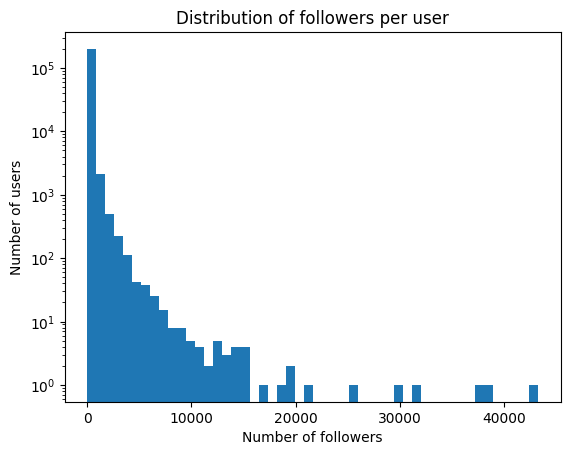

Most followed users:
FollowedID
mashable           43222
leolaporte         38260
barackobama        37400
kevinrose          31696
veronicabelmont    29441
Name: count, dtype: int64


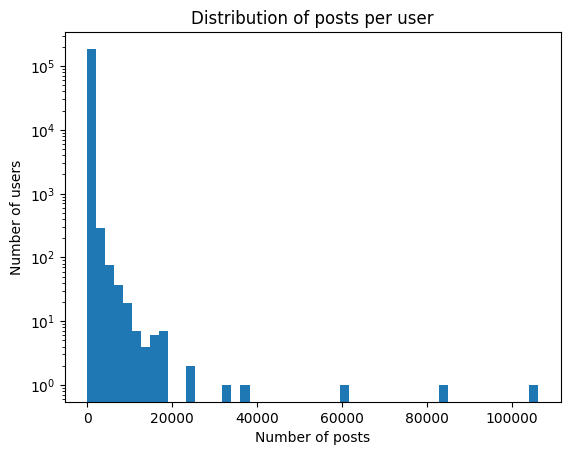

Most active users:
PostedBy
twibfeed        106233
jairmorselli     83301
musiclion        60291
irishblog1       37713
foreveradog      33627
Name: count, dtype: int64


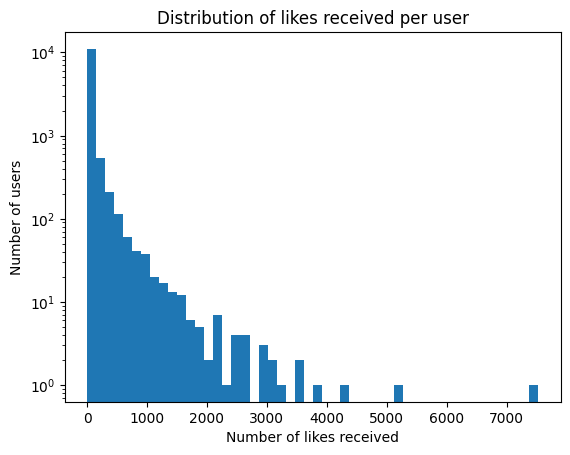

Users with most likes received:
PostedBy
mimyusof       7521
ciaotokio      5148
mahziar        4284
aylar          3828
mehmetozkan    3609
dtype: int64


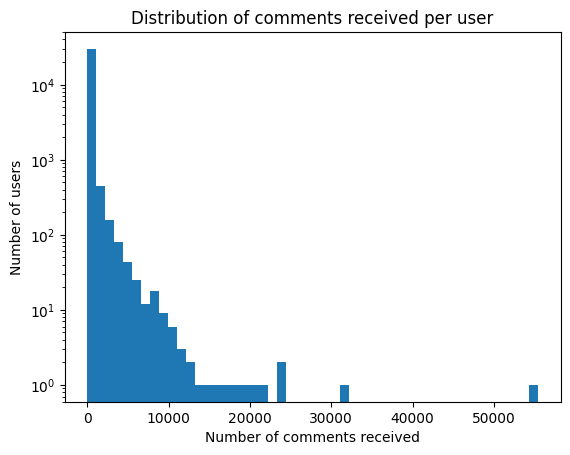

Users with most comments received:
PostedBy_poster
moni81             55416
miladabadan        31935
mutlulukperisi     24105
sidepodcastlive    23856
wishiwerel33t      21279
dtype: int64


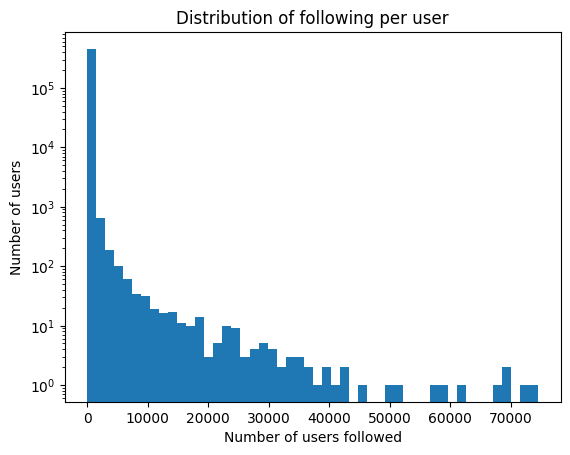

Users who follow the most other users:
FollowerID
br3adman        74522
malikimran      72064
malikimrana1    69649
sonergonul      68620
phasuk111       67414
Name: count, dtype: int64


KeyboardInterrupt: 

In [24]:
# Calculating some basic statistics

# Followers per user
most_followed = following['FollowedID'].value_counts()
plt.hist(most_followed, bins=50)
plt.yscale('log')
plt.xlabel('Number of followers')
plt.ylabel('Number of users')
plt.title('Distribution of followers per user')
plt.savefig('results/followers_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most followed users:")
print(most_followed.head(5))

# Posts per user
most_active = entries['PostedBy'].value_counts()
plt.hist(most_active, bins=50)
plt.yscale('log')
plt.xlabel('Number of posts')
plt.ylabel('Number of users')
plt.title('Distribution of posts per user')
plt.savefig('results/posts_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most active users:")
print(most_active.head(5))

# Likes received per user
likes_received = likes.merge(entries, on='PostID').groupby('PostedBy').size().sort_values(ascending=False)
plt.hist(likes_received, bins=50)
plt.yscale('log')
plt.xlabel('Number of likes received')
plt.ylabel('Number of users')
plt.title('Distribution of likes received per user')
plt.savefig('results/likes_received_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users with most likes received:")
print(likes_received.head(5))

# Comments received per user
comments_entries_merged = comments.merge(entries, on='PostID', suffixes=('_commenter', '_poster'))
comments_received = comments_entries_merged.groupby('PostedBy_poster').size().sort_values(ascending=False)
plt.hist(comments_received, bins=50)
plt.yscale('log')
plt.xlabel('Number of comments received')
plt.ylabel('Number of users')
plt.title('Distribution of comments received per user')
plt.savefig('results/comments_received_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users with most comments received:")
print(comments_received.head(5))

# Following per user
most_following = following['FollowerID'].value_counts()
plt.hist(most_following, bins=50)
plt.yscale('log')
plt.xlabel('Number of users followed')
plt.ylabel('Number of users')
plt.title('Distribution of following per user')
plt.savefig('results/following_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users who follow the most other users:")
print(most_following.head(5))



In [25]:
# show a graph of people following other people
import networkx as nx
G = nx.from_pandas_edgelist(following, source='FollowerID', target='FollowedID', create_using=nx.DiGraph())
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, node_size=10, alpha=0.3, arrows=False)
plt.title('Follower Network')
plt.savefig('results/follower_network.png', dpi=300, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

Step 1: Building the graph...
-> Graph created successfully.
-> Nodes (Users): 496389
-> Edges (Connections): 18017023
------------------------------
Step 2: Running the Louvain algorithm...
-> Community detection complete.
------------------------------
Step 3: Analyzing community results...
-> Discovered 2277 distinct communities.

Top 10 Largest Social Circles:
 CommunityID  NumberOfMembers
           6           175411
           1            57624
           0            51765
           3            48732
          54            27809
           2            25709
         954            23950
           4            14910
           7            14553
          12            13632
------------------------------
Step 4: Merging and saving results...
-> Successfully saved results to 'results/users_with_communities.csv'
------------------------------
Step 5: Sample of users from the largest community (ID: 6):
            ID           Name  CommunityID
       donrday        Don Day 

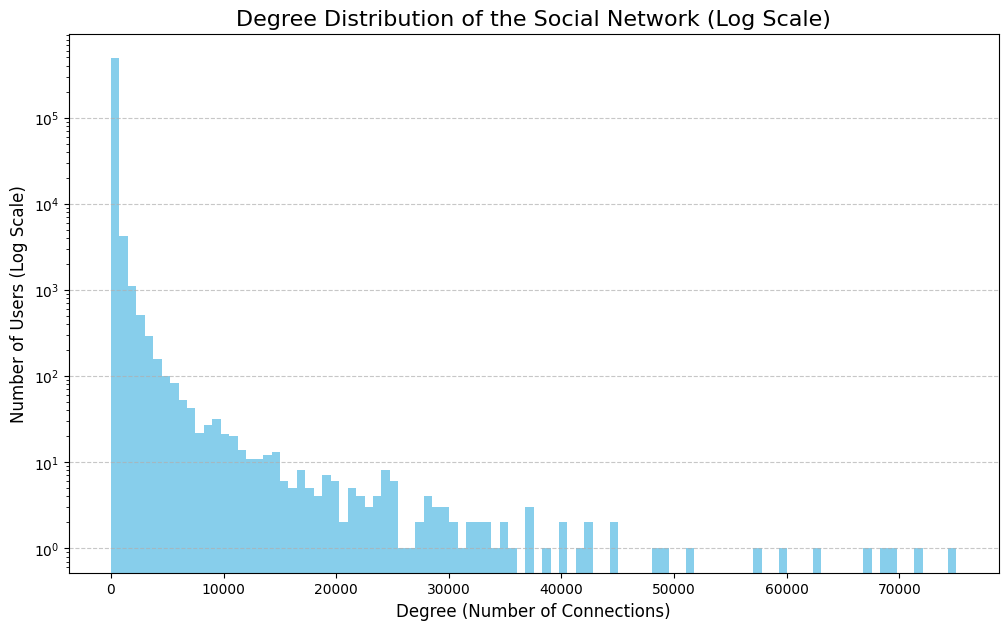

------------------------------
Step 7: Visualizing the largest community (ID: 6)...
-> Largest community has 175411 members.
-> Community is too large to draw clearly. A random sample of 200 nodes will be visualized.
-> Community graph saved to 'results/largest_community_graph.png'


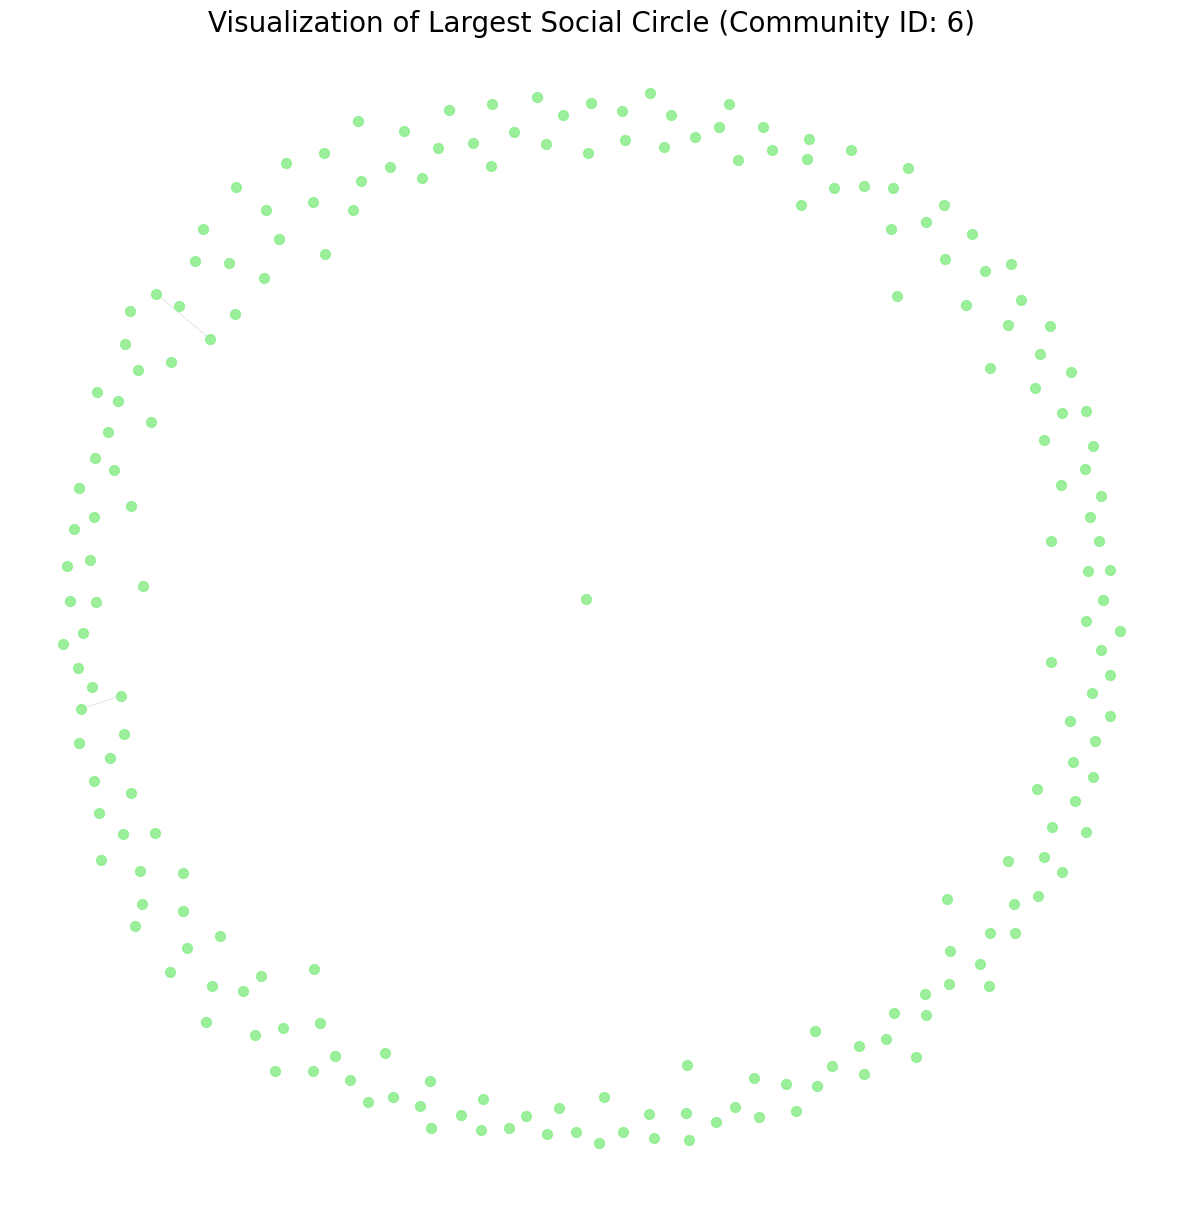

------------------------------


In [27]:
# This script is intended to be run in a Jupyter Notebook cell.
# Assumes 'users' and 'following' DataFrames are already loaded.

import pandas as pd
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# --- 1. Build the Graph (from your existing code) ---
print("Step 1: Building the graph...")
G = nx.from_pandas_edgelist(following, 'FollowerID', 'FollowedID')
print(f"-> Graph created successfully.")
print(f"-> Nodes (Users): {G.number_of_nodes()}")
print(f"-> Edges (Connections): {G.number_of_edges()}")
print("-" * 30)

# --- 2. Detect Communities with Louvain Algorithm (from your existing code) ---
print("Step 2: Running the Louvain algorithm...")
partition = community_louvain.best_partition(G)
print("-> Community detection complete.")
print("-" * 30)

# --- 3. Analyze and Process the Results (from your existing code) ---
print("Step 3: Analyzing community results...")
num_communities = len(set(partition.values()))
print(f"-> Discovered {num_communities} distinct communities.")
partition_df = pd.DataFrame(list(partition.items()), columns=['ID', 'CommunityID'])
community_sizes = partition_df['CommunityID'].value_counts().reset_index()
community_sizes.columns = ['CommunityID', 'NumberOfMembers']
print("\nTop 10 Largest Social Circles:")
print(community_sizes.head(10).to_string(index=False))
print("-" * 30)

# --- 4. Merge and Save Results (from your existing code) ---
print("Step 4: Merging and saving results...")
users_with_communities = pd.merge(users, partition_df, on='ID', how='inner')
output_filepath = "results/users_with_communities.csv"
users_with_communities.to_csv(output_filepath, index=False, encoding='utf-8')
print(f"-> Successfully saved results to '{output_filepath}'")
print("-" * 30)

# --- 5. Display a Sample from the Largest Community (from your existing code) ---
if not community_sizes.empty:
    largest_community_id = community_sizes.iloc[0]['CommunityID']
    print(f"Step 5: Sample of users from the largest community (ID: {largest_community_id}):")
    largest_community_members = users_with_communities[
        users_with_communities['CommunityID'] == largest_community_id
    ]
    print(largest_community_members[['ID', 'Name', 'CommunityID']].head(15).to_string(index=False))
else:
    print("No communities were found to display a sample.")
print("-" * 30)


# --- 6. NEW: Plot Degree Distribution ---
print("Step 6: Generating Degree Distribution Plot...")
# Get the degree (number of connections) for each node
degrees = [G.degree(n) for n in G.nodes()]

# Create the plot
plt.figure(figsize=(12, 7))
plt.hist(degrees, bins=100, log=True, color='skyblue', ec='black')
plt.title('Degree Distribution of the Social Network (Log Scale)', fontsize=16)
plt.xlabel('Degree (Number of Connections)', fontsize=12)
plt.ylabel('Number of Users (Log Scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot to a file
degree_plot_path = 'results/degree_distribution.png'
plt.savefig(degree_plot_path)
print(f"-> Degree distribution plot saved to '{degree_plot_path}'")
plt.show() # Display the plot in the notebook
print("-" * 30)


# --- 7. NEW: Visualize the Largest Community ---
print(f"Step 7: Visualizing the largest community (ID: {largest_community_id})...")

# Extract nodes that belong to the largest community
nodes_in_community = [
    n for n, c_id in partition.items() if c_id == largest_community_id
]

# Create a subgraph containing only the nodes and edges from that community
subgraph = G.subgraph(nodes_in_community)
print(f"-> Largest community has {subgraph.number_of_nodes()} members.")

# For clarity, we'll only draw a sample if the community is too large
if subgraph.number_of_nodes() > 200:
    print("-> Community is too large to draw clearly. A random sample of 200 nodes will be visualized.")
    # Take a random sample of nodes from the subgraph
    sampled_nodes = pd.Series(list(subgraph.nodes())).sample(200, random_state=42).tolist()
    # Create the final subgraph for visualization from the sample
    vis_subgraph = subgraph.subgraph(sampled_nodes)
else:
    vis_subgraph = subgraph

# Draw the graph
plt.figure(figsize=(15, 15))
# Use a spring layout for a more organic look
pos = nx.spring_layout(vis_subgraph, seed=42, k=0.15)

# Draw nodes and edges
nx.draw_networkx_nodes(vis_subgraph, pos, node_size=50, node_color='lightgreen', alpha=0.9)
nx.draw_networkx_edges(vis_subgraph, pos, width=0.5, alpha=0.3, edge_color='gray')

plt.title(f'Visualization of Largest Social Circle (Community ID: {largest_community_id})', fontsize=20)
plt.axis('off') # Hide the axes

# Save the visualization to a file
community_plot_path = 'results/largest_community_graph.png'
plt.savefig(community_plot_path)
print(f"-> Community graph saved to '{community_plot_path}'")
plt.show() # Display the plot in the notebook
print("-" * 30)
